In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [9]:
df = pd.read_csv('Occupancy.csv')

In [10]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

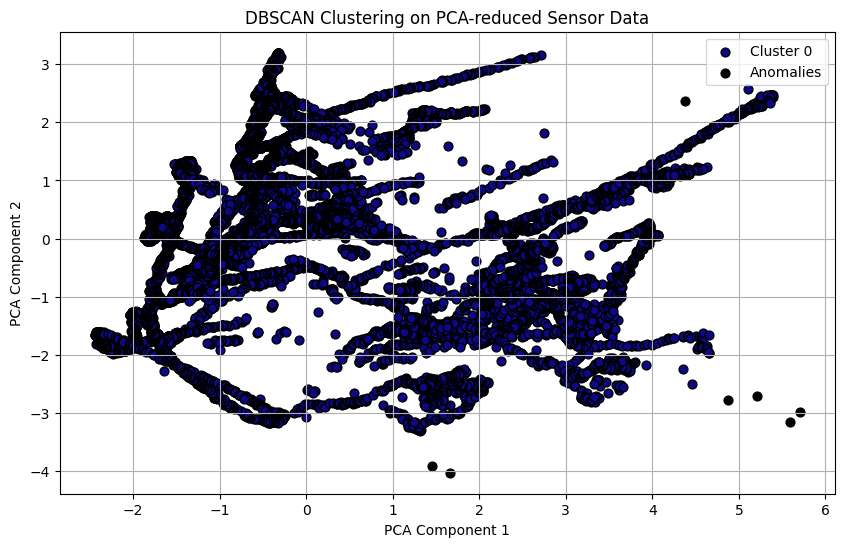

In [13]:
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.plasma(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = (0, 0, 0, 1)
        label = 'Anomalies'
    else:
        label = f'Cluster {k}'
    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=label, edgecolors='k', s=40)

plt.title("DBSCAN Clustering on PCA-reduced Sensor Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
n_anomalies = np.sum(labels == -1)
total_points = len(labels)
anomaly_percentage = (n_anomalies / total_points) * 100

print(f"\nCustom Metric - Percentage of Anomalies Detected: {anomaly_percentage:.2f}%")


Custom Metric - Percentage of Anomalies Detected: 0.03%
